In [211]:
from pathlib import Path
import itertools

import numpy as np

import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

from matplotlib import rcParams

import highlight_text as ht
import themepy

theme = themepy.Theme('paper')
paper_path = Path('../paper/figures/')
slide_path = Path('../slides/figures/math/')
proposal_path = Path('../draft/figures/math/')
#rcParams['path.sketch'] = (.5, 25, 20)

%matplotlib inline

In [212]:
rcParams['font.family'] = 'Segoe Print'
rcParams['figure.dpi'] = 200

In [213]:
fc = rcParams['axes.facecolor']

textsize = 12
labelsize=14

In [245]:
def k_discrete(ax, labelsize, kx =.45, ky=.25):
    xpos, ypos = [.2, .8], [ky, ky]
    ax.scatter(xpos, ypos, s=100, color='C0')
    ax.annotate('K', (kx, ky-.03), fontsize=labelsize)
    return xpos, ypos

In [240]:
def two_fiber_discrete(ax, textsize, labelsize):
    s = .4
    x = .2 - s/2
    y = .425
    off = .6
    f1 = mpatches.Rectangle((x, y), s, s, facecolor=fc, edgecolor='C0', linewidth=2)
    ax.add_patch(f1)
    f2 = mpatches.Rectangle((x+off, y), s, s, facecolor=fc, edgecolor='C0', linewidth=2)
    ax.add_patch(f2)
    thx = .175
    thy = .85
    tvx = -.085
    tvy = .63
    return (x, y, off, s)

In [241]:
def three_fiber_discrete(ax, textsize, labelsize):
    verts = np.array([[[1,-1], [1,1], [2.4, 1.5], [2.4, -.5]],
                 [[-.4,1.5],[-.4,-.5],[1,-1],[1,1]],
                 [[-.4, 1.5], [1, 2],[2.4, 1.5], [1,1]]])
    verts1 = verts*.17 + [.04,.55]
    verts2 = verts1 + [.6, 0]
    p = mcollections.PolyCollection(np.vstack([verts1, verts2]), edgecolor='C0', facecolor=fc, linewidth=2)
    ax.add_collection(p)
    k_discrete(ax, labelsize)
    for off in [0, .6]:
        ax.annotate(r"$\mathbb{R}$", (-0.12 + off, .63), rotation=90, fontsize=textsize) #height
        ax.annotate(r"$\mathbb{R}$", (0.02 + off, .87), rotation=25, fontsize=textsize) # width
        ax.annotate(r"$\mathbb{R}$", (0.25 + off,.84), rotation=-20, fontsize=textsize) # depth


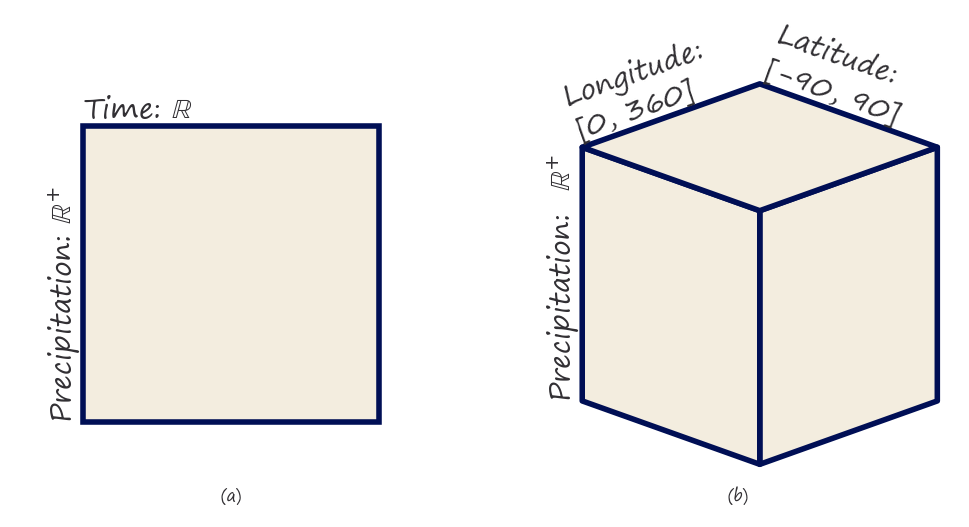

In [242]:
fig, axd = plt.subplot_mosaic([['2d', '3d']])
for ax in axd.values():
    ax.set(xlim=(0,1), ylim=(0,1), aspect='equal')
    ax.axis('off')
    
f1x, f1y = (.15, .15)
size = .7
f1 = mpatches.Rectangle((f1x, f1y), size, size, facecolor=fc, edgecolor='C0', linewidth=2)
axd['2d'].add_patch(f1)

verts = np.array([[[1,-1], [1,1], [2.4, 1.5], [2.4, -.5]],
                 [[-.4,1.5],[-.4,-.5],[1,-1],[1,1]],
                 [[-.4, 1.5], [1, 2],[2.4, 1.5], [1,1]]])
verts1 = verts*.3 + [.25,.35]

p = mcollections.PolyCollection(verts1, edgecolor='C0', facecolor=fc, linewidth=2)
axd['3d'].add_collection(p)

textsize=10
axd['2d'].text(f1x, f1y, r"Precipitation: " + r"$\mathbb{R}^{+}$", rotation=90, ha='right', va='bottom', fontsize=textsize)
axd['2d'].text(f1x, f1y + size, r"Time: " + r"$\mathbb{R}$",  ha='left', va='bottom', fontsize=textsize)
tx, ty = verts1[1, 1]
lax, lay = verts1[1,0]
lox, loy = verts1[2,1]
angle = np.arctan((loy-lay)/(lox-lax))*180/np.pi
bx, by = verts1[1,2]
dis = np.sqrt((tx-bx)**2 + (ty-by)**2)
axd['3d'].text(tx, ty, r"Precipitation: "+ r" $\mathbb{R}^{+}$", rotation=90, ha='right', va='bottom', fontsize=textsize)
axd['3d'].text(lax, lay, "Longitude:\n[0, 360]", rotation=angle, ha='left', va='bottom', fontsize=textsize, 
            rotation_mode='anchor', transform_rotates_text=True)
axd['3d'].text(lox, loy, "Latitude:\n[-90, 90]", rotation=-angle, ha='left', va='bottom', fontsize=textsize, 
                       rotation_mode='anchor', transform_rotates_text=True)

axd['2d'].set_title('(a)', y=-.075, fontsize='xx-small')
axd['3d'].set_title('(b)', y=-.075, fontsize='xx-small')

fig.savefig(slide_path/"fiber.png", bbox_inches='tight' , facecolor='white')
fig.savefig(proposal_path/"fiber.png", bbox_inches='tight', facecolor='white')

In [296]:
def two_fiber_continuous(ax, textsize, labelsize, ky=.25):
    for off in np.arange(-1,3.5,.25):
        verts = np.array([[1,-1], [1,1], [2.4, 1.5], [2.4, -.5], [1,-1]]) + [off, 3.1]
        sverts = verts*.2
        p = mpatches.PathPatch(mpath.Path(sverts, closed=True), edgecolor='C0',facecolor=ax.get_facecolor())
        ax.add_patch(p)
        
        
    #ax.annotate(r"$\mathbb{R}$", (-0.1, .63), rotation=90, fontsize=textsize) #height
    #ax.annotate(r"$\mathbb{R}$", (0.06,.88), rotation=25, fontsize=textsize) # width

    ax.annotate('K', (-.1, ky-.03), fontsize=labelsize)
    xmin=0.15
    xmax=.9
    ax.axhline(y=ky, xmin=xmin, xmax=xmax)
    return sverts, (xmin, xmax)
    

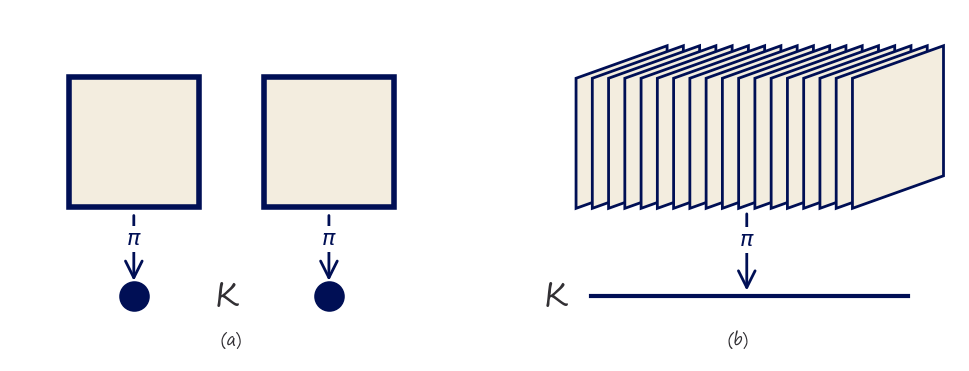

In [305]:
fig, axd = plt.subplot_mosaic([['0D', '1D']])

kpos = (3.75, -2.75)
(x, y, off, s) = two_fiber_discrete(axd['0D'], textsize, labelsize)
(xpos, ypos) = k_discrete(axd['0D'], labelsize, ky=.15)
sverts, (x0, x1) = two_fiber_continuous(axd['1D'], textsize, labelsize, ky=.15)

for (ax, kp) in zip(axd.values(),kpos) :
    ax.set(xlim=(-.15,1.15), ylim=(0,1), aspect='equal')
    ax.axis('off')    

acolor='C0'
ypad = .03
for xi, yi in zip(xpos, ypos):
    ar0 = mpatches.FancyArrowPatch((xi, y-.01), (xi, yi+ypad), color=acolor, mutation_scale=15, transform=axd['0D'].transData, arrowstyle='->')
    axd['0D'].add_patch(ar0)
    axd['0D'].text(xi, y-((y-yi+ypad)/2)*.65, r"$\pi$", ha='center', va='center', color=acolor, fontsize=8, bbox={'facecolor':'white', 'pad':0, 'edgecolor':'none'})
    
ys = sverts[:,1].min()
mid = x0 + (x1-x0)/2

ar1 = mpatches.FancyArrowPatch((mid,ys), (mid, ypos[0]), color='C0', mutation_scale=15, transform=axd['1D'].transData, arrowstyle='->')
axd['1D'].add_patch(ar1)
axd['1D'].text(mid, ys-((ys-ypos[0]+ypad)/2)*.65, r"$\pi$", ha='center', va='center', color=acolor, fontsize=8, bbox={'facecolor':'white', 'pad':0, 'edgecolor':'none'})    

for (n, l) in [('0D', 'a'), ('1D', 'b')]:
    axd[n].set_title(f'({l})', y=-.05, fontsize='xx-small')
fig.savefig(paper_path/"base.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"base.png", bbox_inches='tight', facecolor='white' )
fig.savefig(slide_path/"base.png", bbox_inches='tight', facecolor='white' )

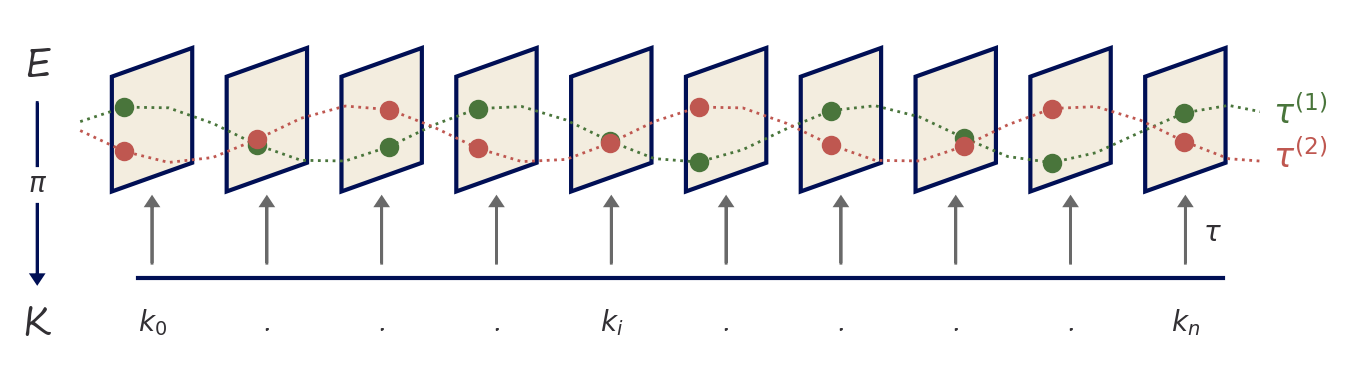

In [221]:
fig, ax = plt.subplots(figsize=(8,3))
x =  np.linspace(-5*np.pi, 7*np.pi)
xv = x[(x>0) & (x <30)]
ys = np.sin(xv)*.5
yc = np.cos(xv+1)*.5

pos_labs = {0:r"$k_0$", 4:r"$k_i$", 9:r"$k_n$"}

ct0 = '#49753B'
ct1 = '#BF5750'

for i, off in enumerate(np.arange(0,20,2)):
    verts = np.array([[1,-1], [1,1], [2.4, 1.5], [2.4, -.5], [1,-1]]) + [off, 0]
    p = mpatches.PathPatch(mpath.Path(verts, closed=True),
                           linewidth=1.5, edgecolor='C0',facecolor=ax.get_facecolor())
    ax.add_patch(p)
    ax.arrow(off+1.7, -2.25, 0, 1, head_width=0.2, head_length=0.15, color='dimgrey')

    ax.text(off+1.7, -3.3, pos_labs.get(i, '.'), fontsize=textsize, ha='center', va="center")
        
    

inds = [1, 4, 7, 9, 12, 14, 17, 20, 22, 25]
ax.scatter(xv[inds], ys[inds], color=ct0, label=r'$\tau^{(1)}$', zorder=10)
ax.scatter(xv[inds], yc[inds], color=ct1, label=r'$\tau^{(2)}$', zorder=10)
ax.plot(xv, ys, color=ct0, linewidth=1, linestyle=':')
ax.text(xv[-2], ys[-1], r'$\tau^{(1)}$', va='bottom', fontsize=12, color=ct0)
ax.plot(xv, yc, color=ct1, linewidth=1, linestyle=':')
ax.text(xv[-2], yc[-3], r'$\tau^{(2)}$', va='center', fontsize=12, color=ct1)

ax.annotate(r'E', (-.3, .8), fontsize=labelsize, ha='center', va='bottom')
ax.annotate(r'K', (-.3, -3.3), fontsize=labelsize, ha='center', va='center')
ax.arrow(-.3, .55, 0, -3, head_width=0.2, head_length=0.15, color='C0')
ax.annotate(r'$\pi$', (-.3, -1), fontsize=textsize, ha='center', bbox={'facecolor':'white', 'edgecolor':'white','pad':.02})
ax.annotate(r'$\tau$', (20, -1.85), fontsize=textsize)
ax.axhline(y=-2.5, xmin=0.095, xmax=.97, zorder=-1)
#ax.legend(bbox_to_anchor=(1.0, .45), loc='lower left', borderaxespad=0, facecolor='white', frameon=False)
#ax.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=2)
ax.set(xlim=(-.6,21), ylim=(-3.5, 2), aspect='equal')
ax.axis('off')
fig.savefig(paper_path/"fiberbundle.png", bbox_inches='tight', facecolor='white' )
fig.savefig(slide_path/"fiberbundle.png", bbox_inches='tight', facecolor='white')
fig.savefig(proposal_path/"fiberbundle.png", bbox_inches='tight', facecolor='white')

In [222]:
.8 --3.3

4.1

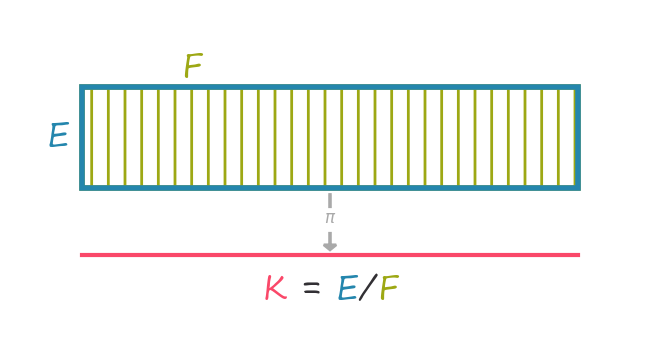

In [236]:
fcolor = '#9DA814'
kcolor = '#FA4869'
ecolor = '#2486AD'
labelsize= 12
fig, ax = plt.subplots(figsize=(4,2))
ex, ey = 0.1, 0.4
h = .3
w = .8
F = mpatches.Rectangle((ex, ey),  w, h,   hatch='||', facecolor='white', edgecolor=fcolor, linewidth=2)
ax.add_patch(F)
ax.text(ex+w*.2, ey+h, 'F', va='bottom', ha='left', fontsize=labelsize, color=fcolor, 
       rotation_mode='anchor', transform_rotates_text=True)

E = mpatches.Rectangle((ex, ey),  w, h, facecolor='none', edgecolor=ecolor, linewidth=2)
ax.add_patch(E)
ax.text(ex-.02, ey+h/2, 'E', ha='right', va='center', fontsize=labelsize, color=ecolor)

y = .2
xmin = 0.1 
xmax = 0.9
line = ax.axhline(y=y, xmin=xmin, xmax=xmax, color=kcolor)
ht.ax_text(xmin+(xmax-xmin)/2, y-.05, s='<K> = <E>/<F>',
            ha='center', va='top', ax=ax,fontsize=labelsize,
            highlight_textprops=[{'color':kcolor}, {'color':ecolor}, {'color':fcolor}])

acolor = 'darkgray'
l = .15
ax.arrow(ex+w/2, ey-.02, 0, -l,  head_width=0.02, head_length=0.015, color=acolor)
ax.text(ex+w/2, ey-.02-l/2, r'$\pi$', va='center', ha='center', color=acolor, fontsize=6, bbox={'color':'white', 'pad':0})
ax.set(xlim=(0,1), ylim=(0,.9))
ax.axis('off')
fig.savefig(proposal_path/"k_qspace.png", bbox_inches='tight', facecolor='white')